In [1]:
import os
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from pylab import cm
from scipy.optimize import fminbound
import matplotlib.ticker as ticker

In [2]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth'] = 2

In [3]:
data = h5py.File(f"/Users/dillon/Desktop/data.h5", "r")
observations = data['observations']

obs_Ia = observations['Ia']
obs_CCSN = observations['CCSN']
obs_LGRB = observations['LGRB']
obs_PISN = observations['PISN']

In [4]:
event_rates = data['event_rates']
h = event_rates.attrs['h']

In [5]:
Millimillennium = h5py.File("/Users/dillon/Desktop/170_300/millimillennium_170_300.h5", "r")
TNG = h5py.File("/Users/dillon/Desktop/170_300/TNG_170_300.h5", "r")
EAGLE = h5py.File("/Users/dillon/Desktop/170_300/EAGLE_170_300.h5", "r")
MD = h5py.File("/Users/dillon/Desktop/170_300/MD_170_300.h5", "r")
harikane22 = h5py.File("/Users/dillon/Desktop/170_300/harikane22_170_300.h5", "r")
empmodel = h5py.File("/Users/dillon/Desktop/170_300/empmodel_170_300.h5", "r")


In [6]:
def set_plot_params(ax):
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', right=True)
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='out', right=True)
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=12))
    ax.yaxis.set_tick_params(which='both', right=False)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='both', top=False)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))


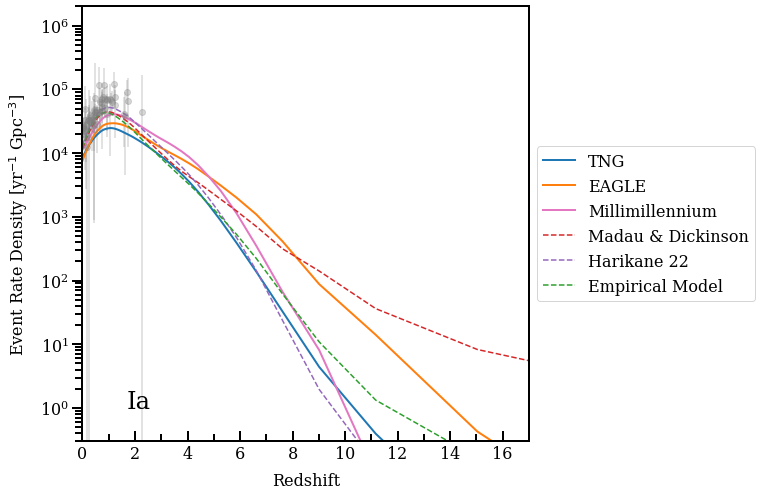

In [7]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e-1, 2e6)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)


plt.plot(TNG['redshift_edges'][:-1], TNG['Ia_rates'], label = 'TNG', lw = 2)
plt.plot(EAGLE['redshift_edges'][:-1], EAGLE['Ia_rates'], label = 'EAGLE', lw = 2)
plt.plot(Millimillennium['redshift_edges'][:-1], Millimillennium['Ia_rates'], color = '#e377c2', label = 'Millimillennium', lw = 2)
plt.plot(MD['redshift_edges'][:-1], MD['Ia_rates'], '--', color = '#d62728', label = 'Madau & Dickinson', alpha = 1)
plt.plot(harikane22['redshift_edges'][:-1], harikane22['Ia_rates'], '--', color = '#9467bd', label = 'Harikane 22', alpha = 1)
plt.plot(empmodel['redshift_edges'][:-1], empmodel['Ia_rates'], '--', color = '#2ca02c', label = 'Empirical Model', alpha = 1)

ax.errorbar(
            np.array(obs_Ia['mean_z']),
            np.array(obs_Ia['rate']) * h**3,
            xerr= [obs_Ia['lower_z'], obs_Ia['upper_z']],
            yerr=[obs_Ia['lower_rate'] * h**3, obs_Ia['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "Ia", transform=ax.transAxes,fontsize=24)

plt.show()

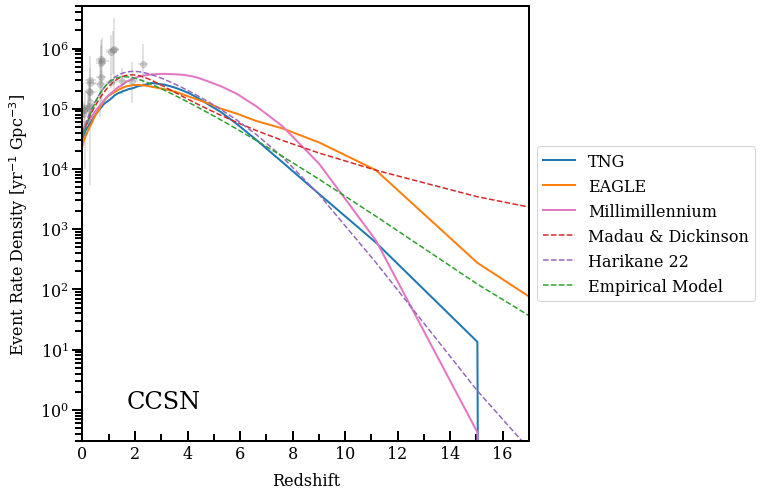

In [8]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e-1, 5e6)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)

plt.plot(TNG['redshift_edges'][:-1], TNG['CCSN_rates'], label = 'TNG', lw = 2)
plt.plot(EAGLE['redshift_edges'][:-1], EAGLE['CCSN_rates'], label = 'EAGLE', lw = 2)
plt.plot(Millimillennium['redshift_edges'][:-1], Millimillennium['CCSN_rates'], color = '#e377c2', label = 'Millimillennium', lw = 2)
plt.plot(MD['redshift_edges'][:-1], MD['CCSN_rates'], '--', color = '#d62728', label = 'Madau & Dickinson', alpha = 1)
plt.plot(harikane22['redshift_edges'][:-1], harikane22['CCSN_rates'], '--', color = '#9467bd', label = 'Harikane 22', alpha = 1)
plt.plot(empmodel['redshift_edges'][:-1], empmodel['CCSN_rates'], '--', color = '#2ca02c', label = 'Empirical Model', alpha = 1)

ax.errorbar(
            np.array(obs_CCSN['mean_z']),
            np.array(obs_CCSN['rate']) * h**3,
            xerr= [obs_CCSN['lower_z'], obs_CCSN['upper_z']],
            yerr=[obs_CCSN['lower_rate'] * h**3, obs_CCSN['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "CCSN", transform=ax.transAxes,fontsize=24)

plt.show()

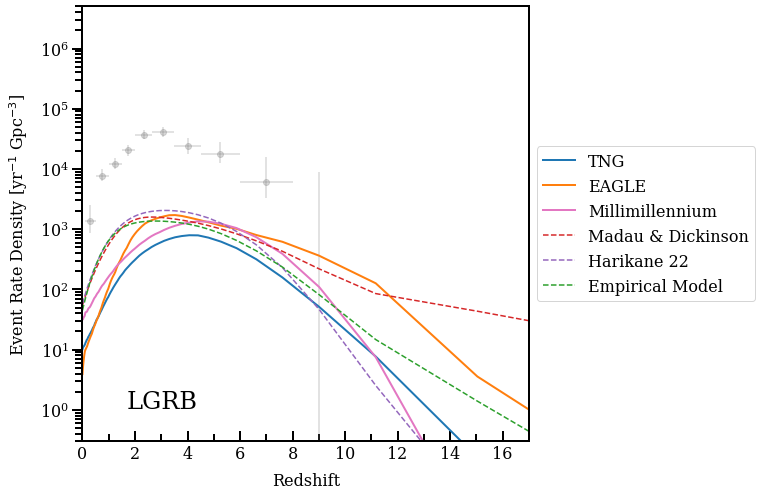

In [9]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e-1, 5e6)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)

plt.plot(TNG['redshift_edges'][:-1], TNG['LGRB_rates'], label = 'TNG', lw = 2)
plt.plot(EAGLE['redshift_edges'][:-1], EAGLE['LGRB_rates'], label = 'EAGLE', lw = 2)
plt.plot(Millimillennium['redshift_edges'][:-1], Millimillennium['LGRB_rates'], color = '#e377c2', label = 'Millimillennium', lw = 2)
plt.plot(MD['redshift_edges'][:-1], MD['LGRB_rates'], '--', color = '#d62728', label = 'Madau & Dickinson', alpha = 1)
plt.plot(harikane22['redshift_edges'][:-1], harikane22['LGRB_rates'], '--', color = '#9467bd', label = 'Harikane 22', alpha = 1)
plt.plot(empmodel['redshift_edges'][:-1], empmodel['LGRB_rates'], '--', color = '#2ca02c', label = 'Empirical Model', alpha = 1)

ax.errorbar(
            np.array(obs_LGRB['mean_z']),
            np.array(obs_LGRB['rate']) * h**3,
            xerr= [obs_LGRB['lower_z'], obs_LGRB['upper_z']],
            yerr=[obs_LGRB['lower_rate'] * h**3, obs_LGRB['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "LGRB", transform=ax.transAxes,fontsize=24)

plt.show()

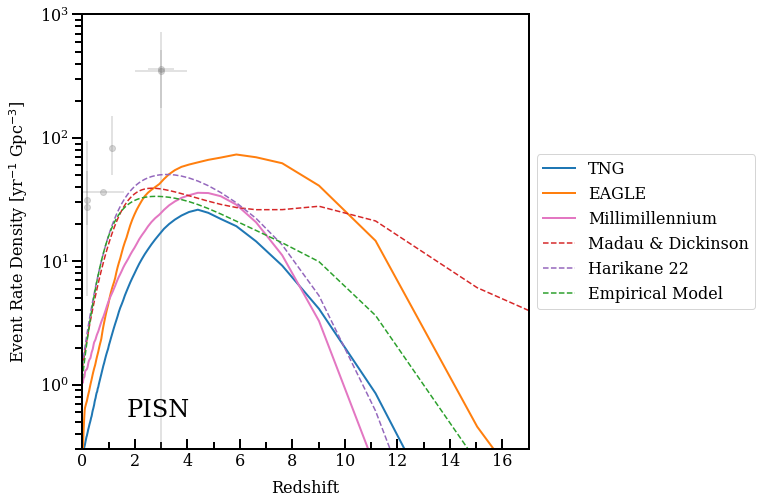

In [10]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e-1, 1e3)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)

plt.plot(TNG['redshift_edges'][:-1], TNG['PISN_rates'], label = 'TNG', lw = 2)
plt.plot(EAGLE['redshift_edges'][:-1], EAGLE['PISN_rates'], label = 'EAGLE', lw = 2)
plt.plot(Millimillennium['redshift_edges'][:-1], Millimillennium['PISN_rates'], color = '#e377c2', label = 'Millimillennium', lw = 2)
plt.plot(MD['redshift_edges'][:-1], MD['PISN_rates'], '--', color = '#d62728', label = 'Madau & Dickinson', alpha = 1)
plt.plot(harikane22['redshift_edges'][:-1], harikane22['PISN_rates'], '--', color = '#9467bd', label = 'Harikane 22', alpha = 1)
plt.plot(empmodel['redshift_edges'][:-1], empmodel['PISN_rates'], '--', color = '#2ca02c', label = 'Empirical Model', alpha = 1)

ax.errorbar(
            np.array(obs_PISN['mean_z']),
            np.array(obs_PISN['rate']) * h**3,
            xerr= [obs_PISN['lower_z'], obs_PISN['upper_z']],
            yerr=[obs_PISN['lower_rate'] * h**3, obs_PISN['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "PISN", transform=ax.transAxes,fontsize=24)

plt.show()

Text(0.48, 0.05, 'Redshift')

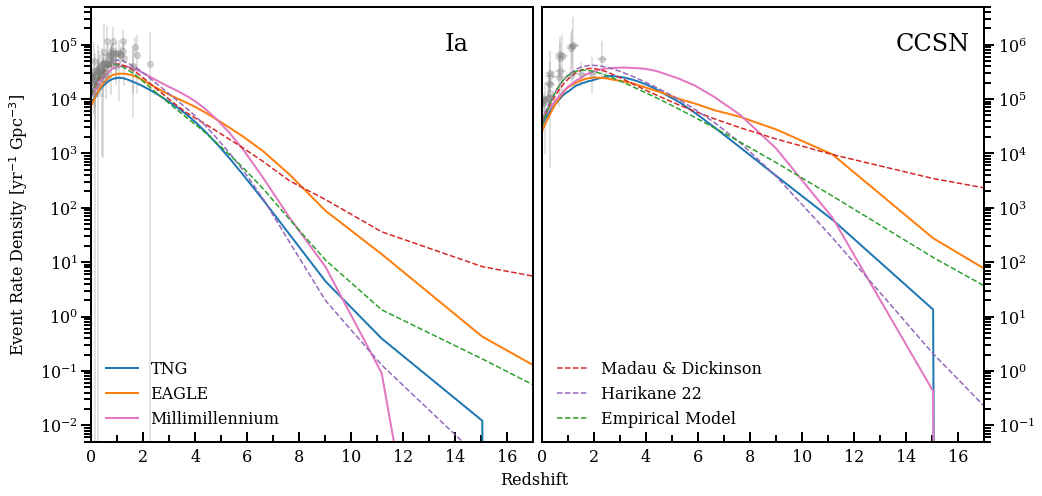

In [11]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
fig.subplots_adjust(wspace=0.02, hspace = 0.1)

axs = axes.flatten()

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlim(0, 17)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='out')
    
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', pad=7)
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=10))
    major_locator = ticker.MultipleLocator(base=2)
    minor_locator = ticker.MultipleLocator(base=1)
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.set_xticks(ax.get_xticks()[1:-1])
    ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()])

    
axs[0].plot(TNG['redshift_edges'][:-1], TNG['Ia_rates'], label='TNG', lw=2)
axs[0].plot(EAGLE['redshift_edges'][:-1], EAGLE['Ia_rates'], label='EAGLE', lw=2)
axs[0].plot(Millimillennium['redshift_edges'][:-1], Millimillennium['Ia_rates'], color='#e377c2', label='Millimillennium', lw=2)
axs[0].plot(MD['redshift_edges'][:-1], MD['Ia_rates'], '--', color='#d62728', alpha=1)
axs[0].plot(harikane22['redshift_edges'][:-1], harikane22['Ia_rates'], '--', color='#9467bd', alpha=1)
axs[0].plot(empmodel['redshift_edges'][:-1], empmodel['Ia_rates'], '--', color='#2ca02c', alpha=1)

axs[0].errorbar(
            np.array(obs_Ia['mean_z']),
            np.array(obs_Ia['rate']) * h**3,
            xerr= [obs_Ia['lower_z'], obs_Ia['upper_z']],
            yerr=[obs_Ia['lower_rate'] * h**3, obs_Ia['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


axs[0].set_ylim(5e-3, 5e5)

axs[0].text(0.8, 0.9, "Ia", transform=axs[0].transAxes, fontsize=24)

axs[0].set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)

axs[0].legend(loc = 'lower left', frameon = False)



axs[1].plot(TNG['redshift_edges'][:-1], TNG['CCSN_rates'], lw=2)
axs[1].plot(EAGLE['redshift_edges'][:-1], EAGLE['CCSN_rates'], lw=2)
axs[1].plot(Millimillennium['redshift_edges'][:-1], Millimillennium['CCSN_rates'], color='#e377c2', lw=2)
axs[1].plot(MD['redshift_edges'][:-1], MD['CCSN_rates'], '--', color='#d62728', label='Madau & Dickinson', alpha=1)
axs[1].plot(harikane22['redshift_edges'][:-1], harikane22['CCSN_rates'], '--', color='#9467bd', label='Harikane 22', alpha=1)
axs[1].plot(empmodel['redshift_edges'][:-1], empmodel['CCSN_rates'], '--', color='#2ca02c', label='Empirical Model', alpha=1)


axs[1].errorbar(
            np.array(obs_CCSN['mean_z']),
            np.array(obs_CCSN['rate']) * h**3,
            xerr= [obs_CCSN['lower_z'], obs_CCSN['upper_z']],
            yerr=[obs_CCSN['lower_rate'] * h**3, obs_CCSN['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


axs[1].yaxis.tick_right()
axs[1].tick_params(axis='y', which='both')

axs[1].set_ylim(5e-2, 5e6)

axs[1].text(0.8, 0.9, "CCSN", transform=axs[1].transAxes, fontsize=24)

axs[1].legend(loc = 'lower left', frameon = False)

fig.text(0.48, 0.05, "Redshift")


Text(0.483, 0.05, 'Redshift')

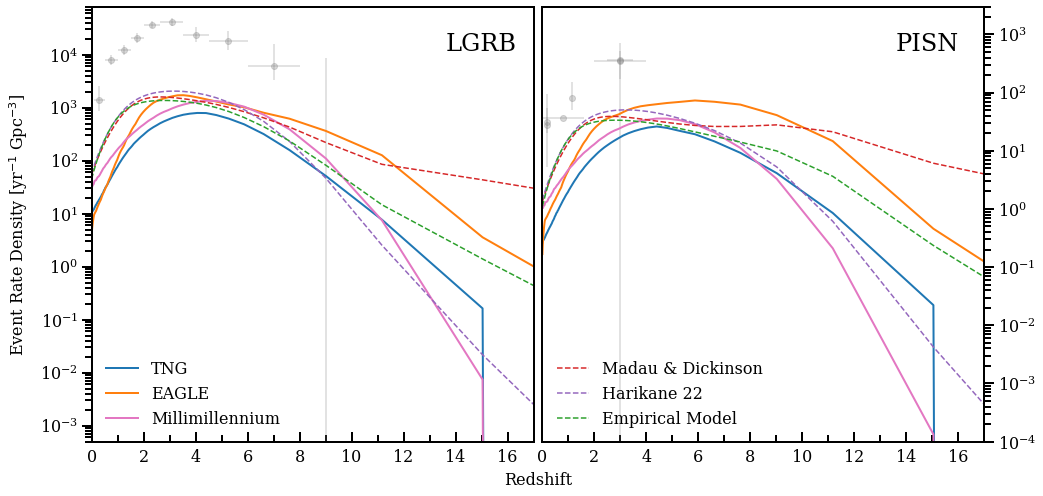

In [12]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
fig.subplots_adjust(wspace=0.02, hspace = 0.1)

axs = axes.flatten()

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlim(0, 17)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='out')
    
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', pad=7)
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=10))
    major_locator = ticker.MultipleLocator(base=2)
    minor_locator = ticker.MultipleLocator(base=1)
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.set_xticks(ax.get_xticks()[1:-1])
    ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()])

    
axs[0].plot(TNG['redshift_edges'][:-1], TNG['LGRB_rates'], label='TNG', lw=2)
axs[0].plot(EAGLE['redshift_edges'][:-1], EAGLE['LGRB_rates'], label='EAGLE', lw=2)
axs[0].plot(Millimillennium['redshift_edges'][:-1], Millimillennium['LGRB_rates'], color='#e377c2', label='Millimillennium', lw=2)
axs[0].plot(MD['redshift_edges'][:-1], MD['LGRB_rates'], '--', color='#d62728', alpha=1)
axs[0].plot(harikane22['redshift_edges'][:-1], harikane22['LGRB_rates'], '--', color='#9467bd', alpha=1)
axs[0].plot(empmodel['redshift_edges'][:-1], empmodel['LGRB_rates'], '--', color='#2ca02c', alpha=1)

axs[0].errorbar(
            np.array(obs_LGRB['mean_z']),
            np.array(obs_LGRB['rate']) * h**3,
            xerr= [obs_LGRB['lower_z'], obs_LGRB['upper_z']],
            yerr=[obs_LGRB['lower_rate'] * h**3, obs_LGRB['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )

axs[0].set_ylim(5e-4, 8e4)

axs[0].text(0.8, 0.9, "LGRB", transform=axs[0].transAxes, fontsize=24)

axs[0].set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)

axs[0].legend(loc = 'lower left', frameon = False)



axs[1].plot(TNG['redshift_edges'][:-1], TNG['PISN_rates'], lw=2)
axs[1].plot(EAGLE['redshift_edges'][:-1], EAGLE['PISN_rates'], lw=2)
axs[1].plot(Millimillennium['redshift_edges'][:-1], Millimillennium['PISN_rates'], color='#e377c2', lw=2)
axs[1].plot(MD['redshift_edges'][:-1], MD['PISN_rates'], '--', color='#d62728', label='Madau & Dickinson', alpha=1)
axs[1].plot(harikane22['redshift_edges'][:-1], harikane22['PISN_rates'], '--', color='#9467bd', label='Harikane 22', alpha=1)
axs[1].plot(empmodel['redshift_edges'][:-1], empmodel['PISN_rates'], '--', color='#2ca02c', label='Empirical Model', alpha=1)


axs[1].errorbar(
            np.array(obs_PISN['mean_z']),
            np.array(obs_PISN['rate']) * h**3,
            xerr= [obs_PISN['lower_z'], obs_PISN['upper_z']],
            yerr=[obs_PISN['lower_rate'] * h**3, obs_PISN['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )

axs[1].yaxis.tick_right()
axs[1].tick_params(axis='y', which='both')

axs[1].set_ylim(1e-4, 3e3)

axs[1].text(0.8, 0.9, "PISN", transform=axs[1].transAxes, fontsize=24)

axs[1].legend(loc = 'lower left', frameon = False)

fig.text(0.483, 0.05, "Redshift")


In [13]:
a = 0
b = 5  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['Ia_rates'], EAGLE['Ia_rates'], Millimillennium['Ia_rates'], MD['Ia_rates'], harikane22['Ia_rates'], empmodel['Ia_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (1.7869219956014804) occurs at redshift 4.798379089637527.
The ratio comes from the models: TNG and Millimillennium.
The y-values for TNG and Millimillennium are 1558.5272001035728 and 4343.493734711837.


In [14]:
a = 5
b = 14  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['Ia_rates'], EAGLE['Ia_rates'], Millimillennium['Ia_rates'], MD['Ia_rates'], harikane22['Ia_rates'], empmodel['Ia_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (395.52727019681095) occurs at redshift 11.167806663976043.
The ratio comes from the models: Millimillennium and MD.
The y-values for Millimillennium and MD are 0.0913226649101255 and 36.21192702391016.


In [15]:
a = 0
b = 5  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['CCSN_rates'], EAGLE['CCSN_rates'], Millimillennium['CCSN_rates'], MD['CCSN_rates'], harikane22['CCSN_rates'], empmodel['CCSN_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (2.3410244620422636) occurs at redshift 4.798379089637527.
The ratio comes from the models: Millimillennium and empmodel.
The y-values for Millimillennium and empmodel are 283191.4378215947 and 84761.85704084569.


In [16]:
a = 5
b = 14  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['CCSN_rates'], EAGLE['CCSN_rates'], Millimillennium['CCSN_rates'], MD['CCSN_rates'], harikane22['CCSN_rates'], empmodel['CCSN_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (33.117349444748804) occurs at redshift 11.167806663976043.
The ratio comes from the models: EAGLE and harikane22.
The y-values for EAGLE and harikane22 are 9589.795334612303 and 281.0826600156163.


In [17]:
a = 0
b = 5  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['LGRB_rates'], EAGLE['LGRB_rates'], Millimillennium['LGRB_rates'], MD['LGRB_rates'], harikane22['LGRB_rates'], empmodel['LGRB_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (13.703725489544217) occurs at redshift 1.5054601594530295e-08.
The ratio comes from the models: EAGLE and harikane22.
The y-values for EAGLE and harikane22 are 3.924698050966501 and 57.70768277076065.


In [18]:
a = 5
b = 14  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['LGRB_rates'], EAGLE['LGRB_rates'], Millimillennium['LGRB_rates'], MD['LGRB_rates'], harikane22['LGRB_rates'], empmodel['LGRB_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (48.85374848826147) occurs at redshift 11.167806663976043.
The ratio comes from the models: EAGLE and harikane22.
The y-values for EAGLE and harikane22 are 126.25093773705731 and 2.532426177878766.


In [19]:
a = 0
b = 5  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['PISN_rates'], EAGLE['PISN_rates'], Millimillennium['PISN_rates'], MD['PISN_rates'], harikane22['PISN_rates'], empmodel['PISN_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (7.484005572249239) occurs at redshift 1.5054601594530295e-08.
The ratio comes from the models: EAGLE and harikane22.
The y-values for EAGLE and harikane22 are 0.16774894199332407 and 1.4231829586102758.


In [20]:
a = 5
b = 14  

redshifts = TNG['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [TNG['PISN_rates'], EAGLE['PISN_rates'], Millimillennium['PISN_rates'], MD['PISN_rates'], harikane22['PISN_rates'], empmodel['PISN_rates']]
model_names = ["TNG", "EAGLE", "Millimillennium", "MD", "harikane22", "empmodel"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (99.72537043447426) occurs at redshift 11.167806663976043.
The ratio comes from the models: Millimillennium and MD.
The y-values for Millimillennium and MD are 0.21079569966106124 and 21.232474934354574.
